In [9]:
# 白话word2vec：https://zhuanlan.zhihu.com/p/81032021 <br>
# 什么是词向量？https://blog.csdn.net/mawenqi0729/article/details/80698350 <br>
# 官方参数解读：https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.html#gensim.models.Word2Vec <br>
# 为什么PCA：https://zhuanlan.zhihu.com/p/37810506 <br>
# https://blog.csdn.net/HLBoy_happy/article/details/77146012 <br>
# 参数解读博客版：https://blog.csdn.net/xiaoQL520/article/details/102509477 <br>
# 负采样：https://zhuanlan.zhihu.com/p/144146838 <br>
# 更多资料：https://zhuanlan.zhihu.com/p/26306795 <br>
# https://mp.weixin.qq.com/s/j8JPMZSPoVT_hQswX5QVxA

import jieba
import re
import numpy as np
from sklearn.decomposition import PCA
import gensim
from gensim.models import Word2Vec
import matplotlib.pylab as plt
import matplotlib

## 1 分词

In [10]:
f = open("sanguo.txt", 'r',encoding='utf-8') #读入文本
lines = []
for line in f: #分别对每段分词
    temp = jieba.lcut(line)  #结巴分词 精确模式
    words = []
    for i in temp:
        #过滤掉所有的标点符号
        i = re.sub("[\s+\.\!\/_,$%^*(+\"\'””《》]+|[+——！，。？、~@#￥%……&*（）：；‘]+", "", i)
        if len(i) > 0:
            words.append(i)
    if len(words) > 0:
        lines.append(words)
print(lines[0:5])#预览前5行分词结果

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\hxsnn\AppData\Local\Temp\jieba.cache
Loading model cost 1.801 seconds.
Prefix dict has been built successfully.


[['三国演义', '上卷'], ['罗贯中'], ['滚滚', '长江', '东', '逝水', '浪花', '淘尽', '英雄', '是非成败', '转头', '空', '青山', '依旧', '在', '几度', '夕阳红'], ['白发', '渔樵', '江渚上', '惯看', '秋月春风', '一壶', '浊酒', '喜相逢', '古今', '多少', '事', '都', '付笑谈', '中'], ['--', '调寄', '临江仙']]


## 2 模型训练

In [11]:
# 调用Word2Vec训练
# 参数：size: 词向量维度；window: 上下文的宽度，min_count为考虑计算的单词的最低词频阈值
model = Word2Vec(lines,vector_size = 20, window = 2 , min_count = 3, epochs=7, negative=10,sg=1)
print("孔明的词向量：\n",model.wv.get_vector('孔明'))
print("\n和孔明相关性最高的前20个词语：")
model.wv.most_similar('孔明', topn = 20)# 与孔明最相关的前20个词语

孔明的词向量：
 [-0.08975534  0.02232574  0.10575794 -0.68440634  0.5023593   0.02204041
  0.64137506  1.1308436  -0.63868815  0.6787716   0.14655106  0.23348208
  0.37066555 -0.8013341   1.1933184   0.81111676  0.06297909  0.08963033
 -0.9122305  -0.5884828 ]

和孔明相关性最高的前20个词语：


[('玄德', 0.8901188969612122),
 ('使者', 0.8839780688285828),
 ('周瑜', 0.8612564206123352),
 ('后主', 0.8574459552764893),
 ('孙权', 0.853380560874939),
 ('成都', 0.8517334461212158),
 ('庞统', 0.8455643653869629),
 ('鲁肃', 0.8430818915367126),
 ('门吏', 0.8427210450172424),
 ('陆逊', 0.8419829607009888),
 ('孙夫人', 0.8275996446609497),
 ('关公', 0.8268150687217712),
 ('维', 0.8252516984939575),
 ('使命', 0.8231714963912964),
 ('司马昭', 0.8220776319503784),
 ('二嫂', 0.8213068842887878),
 ('魏主', 0.8196600079536438),
 ('使人', 0.8194814324378967),
 ('具说', 0.8166372776031494),
 ('瓘', 0.8165969252586365)]

## 3 可视化

In [13]:
 
# 将词向量投影到二维空间，将20维降维
rawWordVec = []
word2ind = {}
for i, w in enumerate(model.wv.index_to_key): #index_to_key 序号,词语
    rawWordVec.append(model.wv[w]) #词向量
    word2ind[w] = i #{词语:序号}
rawWordVec = np.array(rawWordVec)
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)

In [14]:
rawWordVec #降维之前的20维

array([[-4.4707960e-01,  2.4885100e-01,  1.2509568e-01, ...,
        -4.0588090e-01, -1.2511793e+00, -1.0524766e+00],
       [-2.7051106e-01,  1.2717655e+00,  1.6691172e-01, ...,
        -4.6113917e-01, -8.1796920e-01, -1.0036402e+00],
       [-5.1107913e-01,  9.9583852e-01,  4.9583741e-02, ...,
        -1.3687879e-01, -1.0229239e+00, -6.4624399e-01],
       ...,
       [ 1.7471249e-04,  2.8852126e-01, -2.8006771e-01, ...,
        -4.4024906e-01, -4.7235471e-01, -3.5454664e-01],
       [-6.8454191e-02,  2.9296148e-01, -2.9441071e-01, ...,
        -4.6435571e-01, -4.3502352e-01, -3.4058678e-01],
       [-1.1173253e-01,  3.2294077e-01, -3.2595333e-01, ...,
        -4.3191406e-01, -5.2345198e-01, -2.3741800e-01]], dtype=float32)

In [15]:
X_reduced #降维之后2维

array([[-1.444754  , -0.01290623],
       [-0.8746879 ,  0.14850304],
       [-1.1712896 , -0.02001187],
       ...,
       [ 0.05916481, -0.18304127],
       [ 0.09360031, -0.21940565],
       [ 0.22659622, -0.20528531]], dtype=float32)

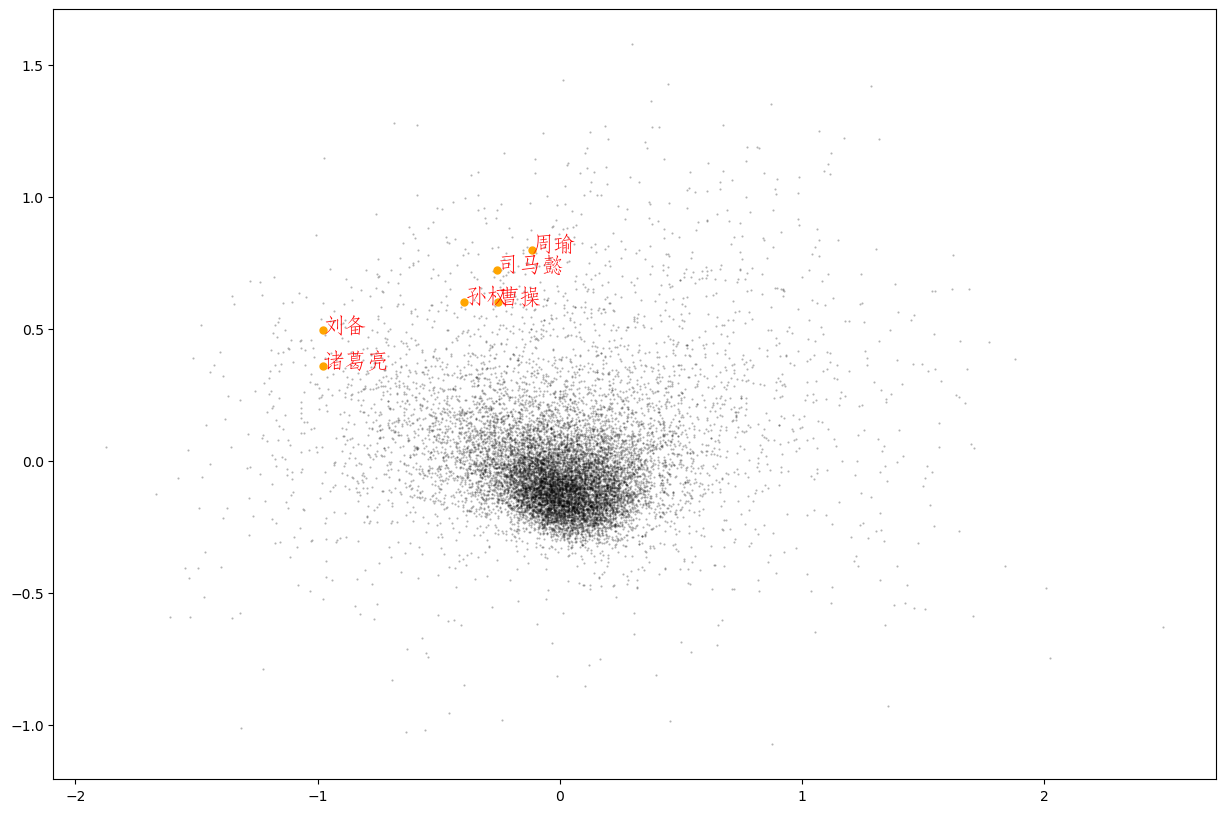

In [19]:
# 绘制星空图
# 绘制所有单词向量的二维空间投影
fig = plt.figure(figsize = (15, 10))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 1, alpha = 0.3, color = 'black')
 
 
# 绘制几个特殊单词的向量
words = ['孙权', '刘备', '曹操', '周瑜', '诸葛亮', '司马懿','汉献帝']
 
# 设置中文字体 否则乱码
zhfont1 = matplotlib.font_manager.FontProperties(fname='./华文仿宋.ttf', size=16)
for w in words:
    if w in word2ind:
        ind = word2ind[w]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], '.', alpha =1, color = 'orange',markersize=10)
        plt.text(xy[0], xy[1], w, fontproperties = zhfont1, alpha = 1, color = 'red')

##  4 类比实验

In [20]:
# 玄德－孔明＝？－曹操
words = model.wv.most_similar(positive=['玄德', '曹操'], negative=['孔明'])
words

[('司马懿', 0.8842570185661316),
 ('吕布', 0.8605151772499084),
 ('袁绍', 0.8502008318901062),
 ('曹真', 0.8371341228485107),
 ('魏主', 0.8326629400253296),
 ('细作', 0.829573929309845),
 ('马超', 0.8294758796691895),
 ('郭淮', 0.8231143355369568),
 ('袁术', 0.8180317282676697),
 ('刘玄德', 0.8137800693511963)]

In [21]:
# 曹操－魏＝？－蜀
words = model.wv.most_similar(positive=['曹操', '蜀'], negative=['魏'])
words

[('袁绍', 0.7474231719970703),
 ('冀州', 0.733879566192627),
 ('五路', 0.7009480595588684),
 ('司马懿', 0.6935940980911255),
 ('马超', 0.6931849718093872),
 ('新野', 0.6854956150054932),
 ('马报', 0.6853044629096985),
 ('孙坚', 0.6794959306716919),
 ('孙权', 0.6784499287605286),
 ('得胜', 0.6739246845245361)]